<a href="https://colab.research.google.com/github/Rmdsketch/Klasifikasi-Gambar-Daun-Untuk-Identifikasi-Jenis-Tanaman-menggunakan-Metode-CNN/blob/main/CNN_KEL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KLASIFIKASI GAMBAR DAUN UNTUK IDENTIFIKASI JENIS TANAMAN**

Kelompok 3
1. Muhamad Ramadani (222102001)
2. Salma Saffana Rizqi (222102031)
3. Erika Mellyana Nur Fajrianti (222102019)

***Konfigurasi Google Drive***

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


***Import Library***

Kami mencoba mengimport berbagai library yang diperlukan untuk memproses dataset berupa gambar, memvisualisasikannya serta membangun dan melatih model tersebut menggunakan Keras dengan backend Tensorflow

In [ ]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

***Menyiapkan Direktori***


Pada kode ini, kami mencoba untuk mempersiapkan jalur/path dan daftar file gambar untuk mempermudah pengelolaan dan pemrosesan dataset. Jika jalur atau daftar file gambar tidak dikelompokkan sejak awal, hal ini dapat memperumit pengelolaan dataset, meningkatkan risiko kesalahan dalam pelabelan, dan pada akhirnya memengaruhi performa pelatihan dalam model. Hal ini penting, terutama dalam konteks supervised learning, yaitu metode pembelajaran mesin di mana model dilatih menggunakan dataset yang telah diberi label untuk memetakan input ke output yang benar berdasarkan data latih tersebut.

In [ ]:
#Direktori data
base_dir = '/content/gdrive/MyDrive/DEEP_LEARNING/Dataset'

Belimbing_wuluh_dir = os.path.join(base_dir, 'Belimbing Wuluh')
Jambu_biji_dir = os.path.join(base_dir, 'Jambu Biji')
Jeruk_nipis_dir = os.path.join(base_dir, 'Jeruk Nipis')
Kemangi_dir = os.path.join(base_dir, 'Kemangi')
Lidah_buaya_dir = os.path.join(base_dir, 'Lidah Buaya')
Nangka_dir = os.path.join(base_dir, 'Nangka')
Pandan_dir = os.path.join(base_dir, 'Pandan')
Pepaya_dir = os.path.join(base_dir, 'Pepaya')
Seledri_dir = os.path.join(base_dir, 'Seledri')


# Mengambil semua nama file dalam masing-masing direktori
belimbing_wuluh_fnames = os.listdir(Belimbing_wuluh_dir)
jambu_biji_fnames = os.listdir(Jambu_biji_dir)
jeruk_nipis_fnames = os.listdir(Jeruk_nipis_dir)
kemangi_fnames = os.listdir(Kemangi_dir)
lidah_buaya_fnames = os.listdir(Lidah_buaya_dir)
nangka_fnames = os.listdir(Nangka_dir)
pandan_fnames = os.listdir(Pandan_dir)
pepaya_fnames = os.listdir(Pepaya_dir)
seledri_fnames = os.listdir(Seledri_dir)

Pada kode ini, kami mencoba memeriksa jumlah data gambar pada setiap folder/path yang sudah dibuat tadi. Dengan total datanya sekitar 3.150 data gambar. Disini selain diperiksa juga dipastikan bahwa jumlah data pada setiap kategori itu cukup seimbang sebelum dilatih ke dalam model.

In [ ]:
#check file
print('Total data jenis daun:')
print(f'Belimbing Wuluh: {len(belimbing_wuluh_fnames)}')
print(f'Jambu Biji: {len(jambu_biji_fnames)}')
print(f'Jeruk Nipis: {len(jeruk_nipis_fnames)}')
print(f'Kemangi: {len(kemangi_fnames)}')
print(f'Lidah Buaya: {len(lidah_buaya_fnames)}')
print(f'Nangka: {len(nangka_fnames)}')
print(f'Pandan: {len(pandan_fnames)}')
print(f'Pepaya: {len(pepaya_fnames)}')
print(f'Seledri: {len(seledri_fnames)}')

Total data jenis daun:
Belimbing Wuluh: 350
Jambu Biji: 350
Jeruk Nipis: 350
Kemangi: 350
Lidah Buaya: 350
Nangka: 350
Pandan: 350
Pepaya: 350
Seledri: 350


***Data Loader***

Pada kode ini, kami berusaha untuk menampilkan gambar dari berbagai kategori daun yang disusun dalam grid, dengan label yang sesuai dengan kategorinya. Selain itu tujuannya yaitu untuk memvalidasi data gambar (memastikan bahwa gambar tetap berada di jalur yang telah ditentukan).

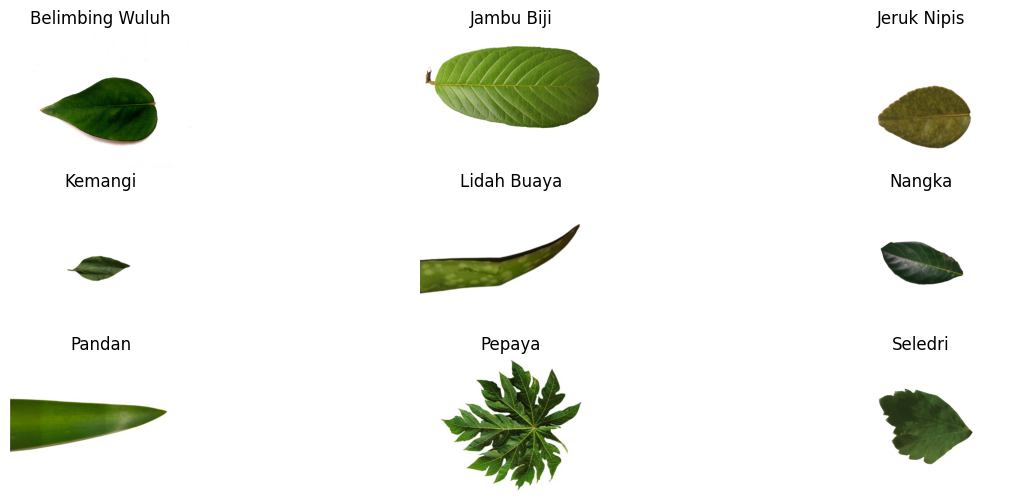

In [ ]:
# Mengatur jumlah baris dan kolom
rows = 3 # Mengubah jumlah baris agar semua gambar muat
cols = 3 # Mengubah jumlah kolom agar semua gambar muat
pic_index = 0

# Menyimpan ke dalam list nama file yang akan ditampilkan
show_images = [
    [os.path.join(Belimbing_wuluh_dir, fname) for fname in belimbing_wuluh_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Jambu_biji_dir, fname) for fname in jambu_biji_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Jeruk_nipis_dir, fname) for fname in jeruk_nipis_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Kemangi_dir, fname) for fname in kemangi_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Lidah_buaya_dir, fname) for fname in lidah_buaya_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Nangka_dir, fname) for fname in nangka_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Pandan_dir, fname) for fname in pandan_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Pepaya_dir, fname) for fname in pepaya_fnames[pic_index:pic_index + rows * cols]],
    [os.path.join(Seledri_dir, fname) for fname in seledri_fnames[pic_index:pic_index + rows * cols]],
]

class_names = [
    'Belimbing Wuluh', 'Jambu Biji', 'Jeruk Nipis', 'Kemangi',
    'Lidah Buaya', 'Nangka', 'Pandan', 'Pepaya',
    'Seledri'
]

#Menampilkan gambar
plt.figure(figsize=(15, 6))  # Menyesuaikan ukuran gambar

for i, (img_list, class_names) in enumerate(zip(show_images, class_names)):
    for j, img_path in enumerate(img_list):
        if j >= rows * cols:
            break  # Menghindari over-indexing

        sp = plt.subplot(rows, cols, i + 1)
        sp.axis('off')

        image = mpimg.imread(img_path)
        plt.imshow(image)
        plt.title(class_names)

plt.show()

***Preprocessing Data***

Pada kode ini, kami mempersiapkan data gambar yang telah dikategorikan untuk dibagi ke dalam set pelatihan (training) dan validasi (validation), dengan proporsi 80% untuk data pelatihan dan 20% untuk data validasi. Selanjutnya, dilakukan teknik augmentasi gambar untuk meningkatkan keragaman data pelatihan yang berguna untuk membantu model belajar lebih baik

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

# Membuat dataset pelatihan
train_dataset = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='training',
    seed=7, # Untuk konsistensi pengacakan
    image_size=(150, 150),
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

# Membuat dataset validasi
validation_dataset = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='validation',
    seed=7,  # Untuk konsistensi pengacakan
    image_size=(150,150),
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 3150 files belonging to 9 classes.
Using 2520 files for training.
Found 3150 files belonging to 9 classes.
Using 630 files for validation.


In [ ]:
# Menerapkan caching, pengacakan, dan prefetching pada dataset pelatihan
train_data = (
    train_dataset
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

# Menerapkan caching dan prefetching pada dataset validasi
validation_data = (
    validation_dataset
    .cache()
    .prefetch(PREFETCH_BUFFER_SIZE)
)

***Membangun Model CNN***

Pada kode ini, kami membangun model untuk melatih dataset gambar yang telah disiapkan. Kami menggunakan Convolutional Neural Network (CNN), salah satu arsitektur deep learning yang populer, untuk melakukan pengenalan objek (object recognition) dan klasifikasi objek (object classification).

CNN merupakan bagian dari Artificial Neural Network (ANN) yang banyak diterapkan dalam pengolahan citra visual. CNN dikembangkan dari konsep Multi-Layer Perceptron (MLP) dan dirancang khusus untuk menangani data berbentuk grid, seperti gambar. Dengan menggunakan CNN, berbagai tugas seperti klasifikasi gambar, segmentasi, dan deteksi objek dapat dilakukan secara efisien.
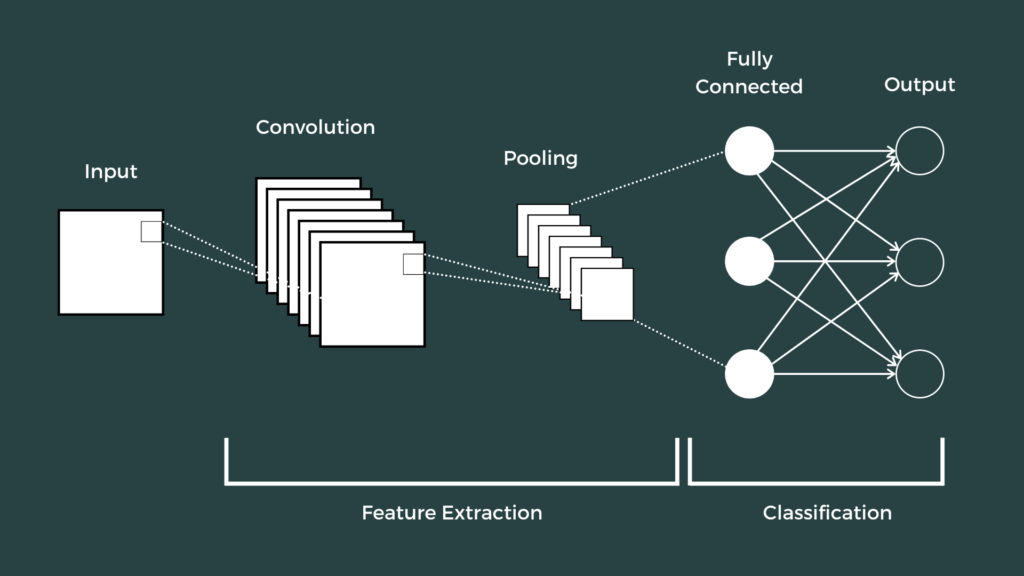

Pada kode ini, kami mencoba membangun model CNN untuk klasifikasi gambar. Model ini terdiri dari beberapa lapisan konvolusi (Conv2D) dan lapisan pengambilan sampel maksimum (MaxPooling2D) untuk mengekstraksi fitur dari gambar. Setelah lapisan konvolusi, gambar diratakan dengan Flatten() sebelum masuk ke lapisan dense (Dense) yang memiliki 256 neuron dan fungsi aktivasi ReLU. Dropout disini ditambahkan untuk mencegah overfitting. Lapisan output memiliki 9 neuron (untuk 9 kelas) dan menggunakan fungsi aktivasi softmax. Model kemudian dikompilasi menggunakan optimizer Adam dan loss categorical crossentropy.

In [ ]:
# Membangun model CNN
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

# Menampilkan summary/keterangan dari model
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,064,265 (4.06 MB)

 Trainable params: 1,064,265 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

***Melatih Model***

Pada kode ini, kami mencoba melatih model dengan menggunakan menggunakan data pelatihan dan validasi. EarlyStopping digunakan untuk menghentikan pelatihan jika tidak ada perbaikan pada nilai val_loss selama 5 epoch berturut-turut, mencegah overfitting. Model CNN ini dilatih selama 25 epoch dengan langkah per epoch yang ditetapkan itu 79 dan langkah validasinya ke 8. Hasil dari pelatihan akan disimpan dalam variabel history yang dapat digunakan untuk menganalisis performa model selama pelatihan.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=25,
    verbose=1,
    validation_steps=8,
    callbacks=[early_stopping]
)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.6036 - loss: 1.0347 - val_accuracy: 0.7930 - val_loss: 0.6249
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.6651 - loss: 0.8813 - val_accuracy: 0.8047 - val_loss: 0.6198
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.6968 - loss: 0.7873 - val_accuracy: 0.7966 - val_loss: 0.6387
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.7230 - loss: 0.6956 - val_accuracy: 0.8516 - val_loss: 0.4811
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.7683 - loss: 0.6270 - val_accuracy: 0.8828 - val_loss: 0.4017
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.8047 - loss: 0.5249 - val_accuracy: 0.8475 - val_loss: 0.4738
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.8354 - loss: 0.4814 - val_accuracy: 0.8750 - val_loss: 0.4292
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.8297 - loss: 0.4685 - val_accuracy: 0.9023 - v

***Visualisasi Akurasi dan Kerugian Model***

Pada kode ini, kami mencoba memvisualisasikan hasil pelatihan model dengan cara menampilkan akurasi dan kerugian (loss) pada data latih dan data validasi selama beberapa epoch.

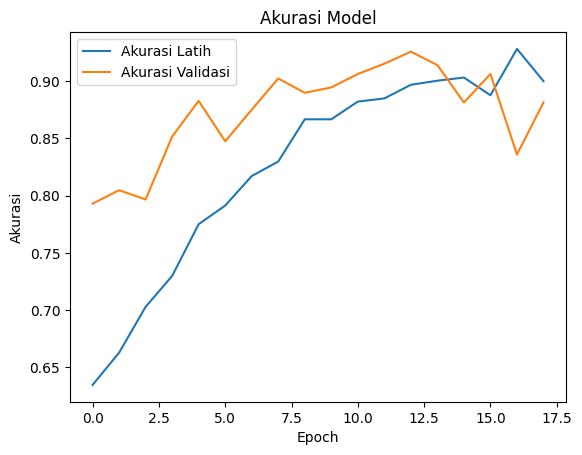

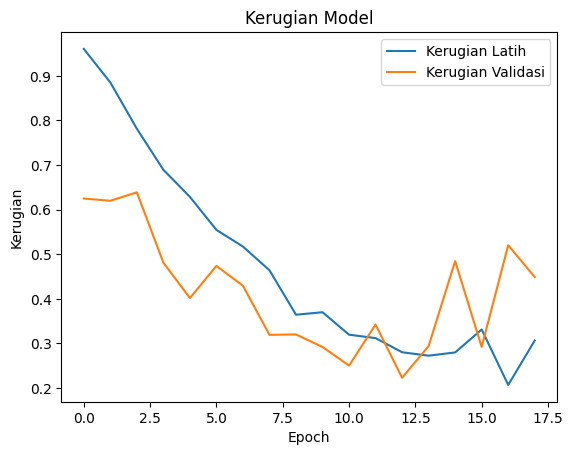

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Kerugian Latih')
plt.plot(history.history['val_loss'], label='Kerugian Validasi')
plt.title('Kerugian Model')
plt.ylabel('Kerugian')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Pada grafik di atas dapat dipantau performa model selama pelatihan. Untuk hasil tampilan grafik model nya cukup bagus, akurasi latih nya meningkat secara signifikan. begitu pula dengan kerugian latih yang menurun.

**Analisis Prediksi Menggunakan Confusion Matrix dan Laporan Klasifikasi**

Untuk mengevaluasi performa model, digunakan confusion matrix dan laporan klasifikasi. Confusion matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas, sehingga mempermudah analisis kesalahan model. Sementara itu, laporan klasifikasi memberikan metrik seperti precision, recall, dan f1-score, yang digunakan untuk menilai sejauh mana model mampu mengklasifikasikan data validasi dengan akurasi yang baik.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


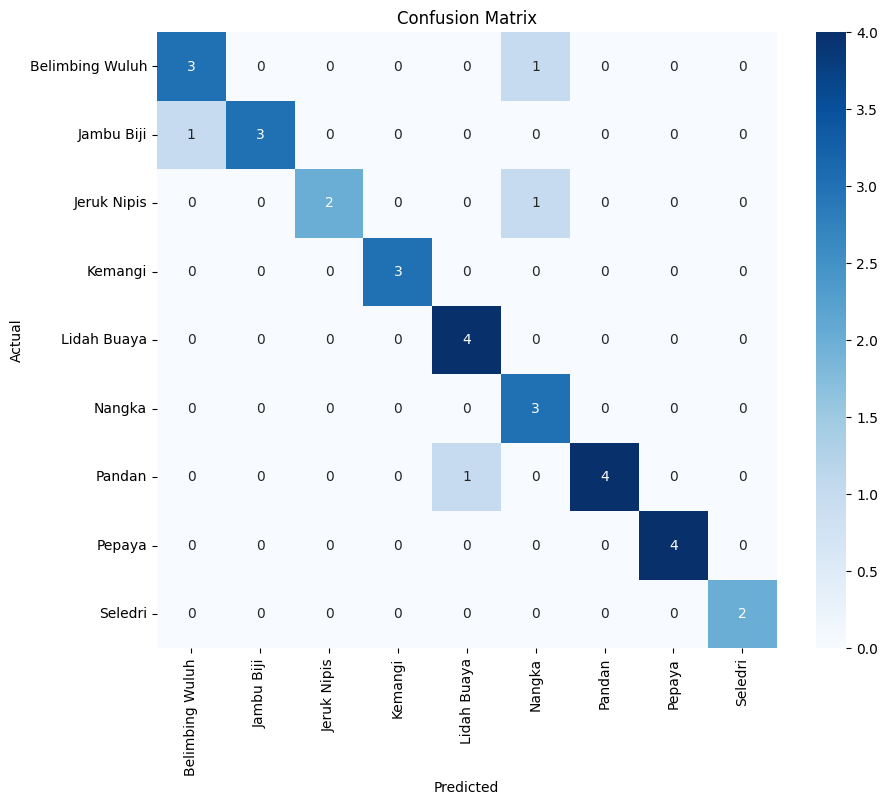

                 precision    recall  f1-score   support

Belimbing Wuluh       0.75      0.75      0.75         4
     Jambu Biji       1.00      0.75      0.86         4
    Jeruk Nipis       1.00      0.67      0.80         3
        Kemangi       1.00      1.00      1.00         3
    Lidah Buaya       0.80      1.00      0.89         4
         Nangka       0.60      1.00      0.75         3
         Pandan       1.00      0.80      0.89         5
         Pepaya       1.00      1.00      1.00         4
        Seledri       1.00      1.00      1.00         2

       accuracy                           0.88        32
      macro avg       0.91      0.89      0.88        32
   weighted avg       0.91      0.88      0.88        32



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_names = [
    'Belimbing Wuluh', 'Jambu Biji', 'Jeruk Nipis', 'Kemangi',
    'Lidah Buaya', 'Nangka', 'Pandan', 'Pepaya',
    'Seledri'
]

for val_images, val_labels in validation_data.take(1):
    predictions = model.predict(val_images)
    predicted_classes = np.argmax(predictions, axis=1)

    cm = confusion_matrix(np.argmax(val_labels, axis=1), predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(np.argmax(val_labels, axis=1), predicted_classes, target_names=class_names))


***Menyimpan Model Yang Telah Dilatih***

In [ ]:
from google.colab import files
model.save("model_trained.keras")
files.download("model_trained.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Memuat Kembali Model Yang Telah Dilatih***

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/DEEP_LEARNING/model_trained.keras')

***Prediksi Gambar***

Saving strawberry.jpg to strawberry (1).jpg


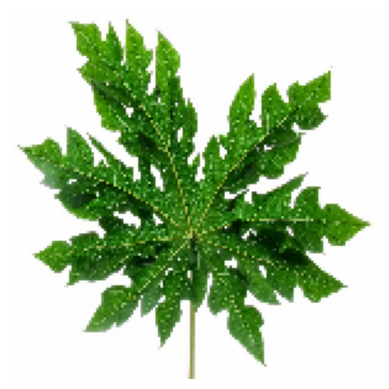

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediksi: Pepaya dengan probabilitas: 1.00
Gambar: strawberry (1).jpg


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

class_names = [
    'Belimbing Wuluh', 'Jambu Biji', 'Jeruk Nipis', 'Kemangi',
    'Lidah Buaya', 'Nangka', 'Pandan', 'Pepaya',
    'Seledri'
]

uploaded = files.upload()
for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    predicted_class = np.argmax(classes[0])

    print(f'Prediksi: {class_names[predicted_class]} dengan probabilitas: {classes[0][predicted_class]:.2f}')
    print(f'Gambar: {fn}')
